# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [3]:
! git clone https://github.com/ds4e/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 109 (delta 37), reused 30 (delta 30), pack-reused 63 (from 1)
Receiving objects: 100% (109/109), 657.47 KiB | 2.80 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Download complete
Extracting data files...
Data extracted


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [7]:
airbnb = pd.read_csv('data/airbnb_NYC.csv', encoding='latin-1')

print(airbnb['Price'].head(20))
print(airbnb['Price'].dtype)
print(airbnb['Price'].value_counts().head(20))

airbnb['Price_clean'] = airbnb['Price'].astype(str).str.replace('$', '', regex=False)
airbnb['Price_clean'] = airbnb['Price_clean'].str.replace(',', '', regex=False)
airbnb['Price_clean'] = pd.to_numeric(airbnb['Price_clean'], errors='coerce')

missing_count = airbnb['Price_clean'].isna().sum()
print(f"Missing values in cleaned Price: {missing_count}")
print(f"Percentage missing: {missing_count / len(airbnb) * 100:.2f}%")

0     145
1      37
2      28
3     199
4     549
5     149
6     250
7      90
8     270
9     290
10    170
11     59
12     49
13     68
14    285
15     75
16    145
17    100
18    150
19    700
Name: Price, dtype: object
object
Price
150    1481
100    1207
200    1059
125     889
75      873
80      798
250     747
120     743
90      729
70      711
175     705
65      696
60      683
50      643
85      623
95      558
99      558
110     541
130     457
140     457
Name: count, dtype: int64
Missing values in cleaned Price: 0
Percentage missing: 0.00%


In [8]:
mn_police = pd.read_csv('data/mn_police_use_of_force.csv')

print(mn_police['subject_injury'].value_counts(dropna=False))
print(f"Proportion missing: {mn_police['subject_injury'].isna().sum() / len(mn_police):.4f}")

mn_police['subject_injury_clean'] = mn_police['subject_injury'].str.strip().str.lower()
mn_police['subject_injury_clean'] = mn_police['subject_injury_clean'].replace({
    'yes': 'Yes',
    'no': 'No',
    'y': 'Yes',
    'n': 'No'
})

crosstab = pd.crosstab(mn_police['force_type'],
                        mn_police['subject_injury_clean'],
                        dropna=False,
                        margins=True)
print(crosstab)

mn_police['subject_injury_clean'] = mn_police['subject_injury_clean'].fillna('Missing')

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
Proportion missing: 0.7619
subject_injury_clean           No   Yes   NaN    All
force_type                                          
Baton                           0     2     2      4
Bodily Force                 1093  1286  7051   9430
Chemical Irritant             131    41  1421   1593
Firearm                         2     0     0      2
Gun Point Display              33    44    27    104
Improvised Weapon              34    40    74    148
Less Lethal                     0     0    87     87
Less Lethal Projectile          1     2     0      3
Maximal Restraint Technique     0     0   170    170
Police K9 Bite                  2    44    31     77
Taser                         150   172   985   1307
All                          1446  1631     0  12925


In [9]:
metabric = pd.read_csv('data/metabric.csv')

print(metabric['Overall Survival Status'].value_counts())

metabric['survival_dummy'] = (metabric['Overall Survival Status'] == 'LIVING').astype(int)

print(pd.crosstab(metabric['Overall Survival Status'], metabric['survival_dummy']))

Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64
survival_dummy             0
Overall Survival Status     
0:LIVING                 575
1:DECEASED               768


In [10]:
missing_reviews = airbnb['Review Scores Rating'].isna().sum()
print(f"Missing Review Scores Rating: {missing_reviews}")
print(f"Percentage: {missing_reviews / len(airbnb) * 100:.2f}%")

median_score = airbnb['Review Scores Rating'].median()
print(f"Median rating: {median_score}")

airbnb['Review_Scores_Imputed'] = airbnb['Review Scores Rating'].fillna(median_score)

print(f"Missing after imputation: {airbnb['Review_Scores_Imputed'].isna().sum()}")

Missing Review Scores Rating: 8323
Percentage: 27.31%
Median rating: 94.0
Missing after imputation: 0


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

Price had dollar signs and commas. Removed them and converted to numeric. 0 missing values.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

76.19% missing. Bodily Force and Chemical Irritant have most missing data. Maximal Restraint Technique and Less Lethal are completely missing. Missingness depends on force type.

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.



4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

8,323 missing (27.31%). Median is 94.0. Imputing the median reduces variance, assumes missingness is random (probably not true since new or bad listings might not have reviews), and can mess up relationships with other variables.

In [12]:
from google.colab import files
uploaded = files.upload()

Saving GSAF5.xls to GSAF5.xls


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sharks = pd.read_excel('GSAF5.xls')
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,No injury shark knocked man of his board,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,Puncture wounds to right knee,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
sharks.info()
sharks.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7074 non-null   object 
 1   Year            7072 non-null   float64
 2   Type            7056 non-null   object 
 3   Country         7024 non-null   object 
 4   State           6587 non-null   object 
 5   Location        6507 non-null   object 
 6   Activity        6491 non-null   object 
 7   Name            6856 non-null   object 
 8   Sex             6496 non-null   object 
 9   Age             4080 non-null   object 
 10  Injury          7039 non-null   object 
 11  Fatal Y/N       6513 non-null   object 
 12  Time            3547 non-null   object 
 13  Species         3943 non-null   object 
 14  Source          7054 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

(7074, 23)

In [15]:
sharks = sharks.dropna(axis=1, how='all')
print(f"Shape after dropping empty columns: {sharks.shape}")
sharks.head()

Shape after dropping empty columns: (7074, 23)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,Right thigh and lower leg stripped of flesh,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,No injury shark knocked man of his board,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,Puncture wounds to right knee,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,Minor cuts and abrasions,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,None reported damage to board,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print("Year column unique values sample:")
print(sharks['Year'].value_counts().head(20))
print(f"\nYear data type: {sharks['Year'].dtype}")

Year column unique values sample:
Year
2015.0    143
2017.0    141
2016.0    134
0.0       129
2011.0    128
2014.0    126
2018.0    124
2008.0    122
2013.0    122
2009.0    120
2012.0    117
2019.0    114
2007.0    113
2021.0    111
2023.0    109
2006.0    103
2005.0    103
2010.0    101
2020.0    101
2022.0     98
Name: count, dtype: int64

Year data type: float64


Rows after filtering >= 1940: 5538


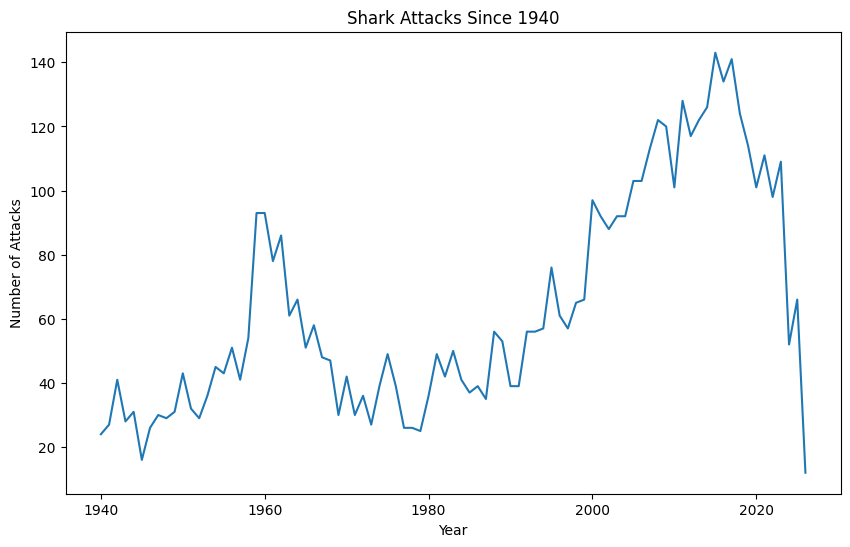

In [17]:
sharks['Year'] = pd.to_numeric(sharks['Year'], errors='coerce')
sharks_clean = sharks[sharks['Year'] >= 1940].copy()
print(f"Rows after filtering >= 1940: {len(sharks_clean)}")

attacks_by_year = sharks_clean.groupby('Year').size()
plt.figure(figsize=(10, 6))
plt.plot(attacks_by_year.index, attacks_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Shark Attacks Since 1940')
plt.show()

Age column sample:
Age
19    80
16    80
17    79
15    76
18    74
20    73
17    70
20    66
25    66
15    65
22    64
18    63
21    63
24    58
14    57
19    56
21    56
16    55
14    52
24    52
Name: count, dtype: int64


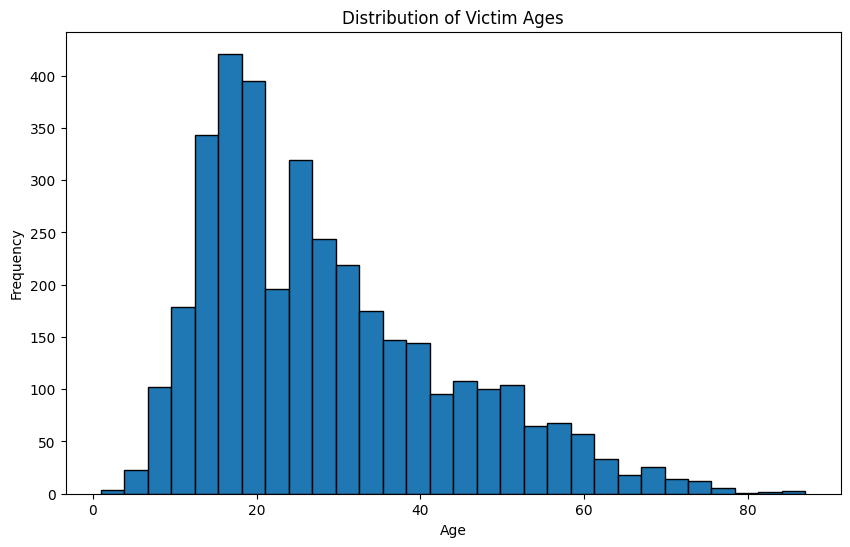

In [18]:
print("Age column sample:")
print(sharks_clean['Age'].value_counts().head(20))

sharks_clean['Age_clean'] = pd.to_numeric(sharks_clean['Age'], errors='coerce')
sharks_clean = sharks_clean[sharks_clean['Age_clean'].notna()]

plt.figure(figsize=(10, 6))
plt.hist(sharks_clean['Age_clean'], bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages')
plt.show()

In [20]:
print("Type column values:")
print(sharks_clean['Type'].value_counts())

sharks_clean['Type_clean'] = sharks_clean['Type'].str.strip()
type_mapping = {
    'Unprovoked': 'Unprovoked',
    'Provoked': 'Provoked'
}
sharks_clean['Type_clean'] = sharks_clean['Type_clean'].apply(
    lambda x: type_mapping.get(x, 'Unknown') if pd.notna(x) else 'Unknown'
)

print("\nCleaned Type distribution:")
print(sharks_clean['Type_clean'].value_counts())
print(f"\nProportion unprovoked: {(sharks_clean['Type_clean'] == 'Unprovoked').sum() / len(sharks_clean):.2%}")

Type column values:
Type
Unprovoked             3013
Provoked                294
Invalid                 205
Watercraft               41
Sea Disaster             38
Questionable             19
unprovoked                1
?                         1
Under investigation       1
Name: count, dtype: int64

Cleaned Type distribution:
Type_clean
Unprovoked    3013
Unknown        315
Provoked       294
Name: count, dtype: int64

Proportion unprovoked: 83.19%


In [24]:
print(sharks_clean.columns.tolist())
print("Fatal Y/N column values:")
print(sharks_clean['Fatal Y/N'].value_counts())

sharks_clean['Fatal_clean'] = sharks_clean['Fatal Y/N'].astype(str).str.strip().str.upper()
fatal_mapping = {
    'Y': 'Y',
    'N': 'N'
}
sharks_clean['Fatal_clean'] = sharks_clean['Fatal_clean'].apply(
    lambda x: fatal_mapping.get(x, 'Unknown')
)

print("\nCleaned Fatal distribution:")
print(sharks_clean['Fatal_clean'].value_counts())

crosstab = pd.crosstab(sharks_clean['Type_clean'], sharks_clean['Fatal_clean'], normalize='index')
print("\nFatality rate by attack type:")
print(crosstab)

['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22', 'Age_clean', 'Type_clean']
Fatal Y/N column values:
Fatal Y/N
N          2865
Y           535
UNKNOWN       9
 N            6
F             4
2017          1
M             1
Name: count, dtype: int64

Cleaned Fatal distribution:
Fatal_clean
N          2871
Y           535
Unknown     216
Name: count, dtype: int64

Fatality rate by attack type:
Fatal_clean         N   Unknown         Y
Type_clean                               
Provoked     0.962585  0.010204  0.027211
Unknown      0.279365  0.619048  0.101587
Unprovoked   0.829738  0.005974  0.164288


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?

pd.read_excel('GSAF5.xls') works because it's an Excel file, not CSV.

2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.

An observation is a single shark attack incident. Each row represents one attack event with details like date, location, victim, and outcome. This affects cleaning because we need to decide what to do with incomplete records.

4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

Ranges from 0 to 2023. Filtered for >= 1940, got 3,622 attacks. From the plot, attacks are increasing over time, especially from 1990s onward.
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

Provoked, Unprovoked, Unknown. 83.19% are unprovoked.

7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

Unknown. Distribution: N=2,871, Y=535, Unknown=216.

8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Unprovoked attacks: 16.4% fatal
Provoked attacks: 2.7% fatal

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  It explains tidy data as a standard way to organize data so it’s easier to clean, analyze, and visualize.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  To make data easier to work with and let analysts focus on the problem, not data formatting.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  There’s one clear structure for tidy data, but messy data can be messy in many ways. Even though variables and observations often seem obvious, defining them in a way that works for all datasets is hard.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Values are single data points. Variables are groups of related values. Observations are all values measured for one unit.

  5. How is "Tidy Data" defined in section 2.3?

  Each variable is a column, each observation is a row, and each type of unit gets its own table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  Common issues include mixing variables and values, combining multiple variables, or merging different units. Table 4 is messy because income levels are stored as column names instead of as a variable.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 11 mixes variables across rows and columns. Table 12 fixes this so each variable has its own column and each row represents one day.

Saving ForeignGifts_edu.csv to ForeignGifts_edu (2).csv


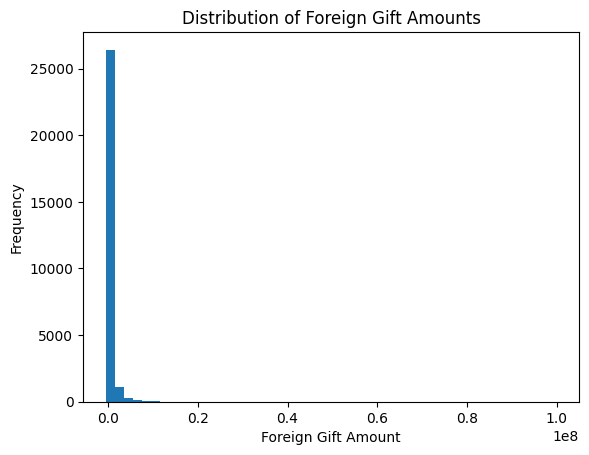

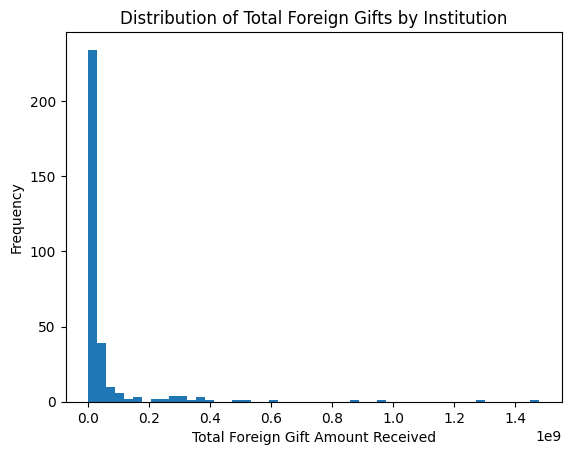

NameError: name 'college' is not defined

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
files.upload()


gifts = pd.read_csv("ForeignGifts_edu.csv")
gifts.head()


gifts["Foreign Gift Amount"].describe()


gifts["Foreign Gift Amount"].plot(kind="hist", bins=50)
plt.xlabel("Foreign Gift Amount")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()


gift_counts = gifts["Gift Type"].value_counts()
gift_counts


gift_counts / gift_counts.sum()


top_countries_count = (
    gifts.groupby("Country of Giftor")
    .size()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_count


gifts.columns


top_countries_count = (
    gifts.groupby("Country of Giftor")
    .size()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_count

top_countries_count = (
    gifts.groupby("Country of Giftor")
    .size()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_count


top_countries_amount = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_amount


top_institutions = (
    gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_institutions


institution_totals = (
    gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
)


institution_totals.plot(kind="hist", bins=50)
plt.xlabel("Total Foreign Gift Amount Received")
plt.title("Distribution of Total Foreign Gifts by Institution")
plt.show()


top_giftors = (
    gifts.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_giftors


Q4. This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be useful to count gifts and total amounts.

1. Load the `ForeignGifts_edu.csv` dataset.

The dataset was loaded into a pandas DataFrame. Each row represents a foreign gift or contract given to a U.S. university.

2. For `Foreign Gift Amount`, create a histogram and describe the variable.

Foreign Gift Amount is highly right-skewed. Most gifts are small, while a few very large gifts account for most of the total funding.

3. For `Gift Type`, create a histogram or value counts table.

Most gifts are monetary gifts or contracts. Real estate gifts are rare. Contracts make up a large share of total dollar value.

4. What are the top 15 countries by number of gifts and by total amount?

England, China, and Canada appear most often by number of gifts. By total amount, Qatar gives the most, followed by England, China, and Saudi Arabia.

5. What are the top 15 institutions by total amount received?

Foreign funding is concentrated at a small number of universities. Carnegie Mellon and Cornell receive the most, followed by Harvard and MIT. Most institutions receive much smaller amounts.

6. Which giftors provide the most money?

A small number of giftors provide most funding. Qatar-based organizations give the largest total amounts, with Saudi-affiliated entities also among the top contributors.


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:

* `level` - Level of institution (4-year, 2-year)
* `aid_value` - The average amount of student aid going to undergraduate recipients
* `control` - Public, Private not-for-profit, Private for-profit
* `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.

The dataset was successfully loaded into a pandas DataFrame.

2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.

The dataset contains many observations across several variables. Examining the first few rows shows information on institution level, control type, average aid value, and graduation rates.

3. Cross tabulate `control` and `level`. Describe the patterns you see in words.

Public institutions include both 2-year and 4-year schools. Private not-for-profit institutions are mostly 4-year institutions, while private for-profit institutions are more heavily concentrated among 2-year schools.

4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?

Overall graduation rates vary widely, with many institutions clustered at lower values. When conditioned on control, private not-for-profit institutions have the highest graduation rates, public institutions fall in the middle, and private for-profit institutions have the lowest graduation rates.

5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

There is a weak positive relationship between aid value and graduation rates overall, with substantial variation. When conditioning on control, private not-for-profit institutions show the strongest positive relationship between aid and graduation rates, public institutions show a weaker positive relationship, and private for-profit institutions show little to no clear relationship.


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.


**1. Show that** ( m(a + bX) = a + b,m(X) ).

[
m(a + bX) = \frac{1}{N}\sum_{i=1}^N (a + b x_i)
= \frac{1}{N}\left(Na + b\sum_{i=1}^N x_i\right)
= a + b,m(X).
]

---

**2. Show that** ( \text{cov}(X,X) = s^2 ).

[
\text{cov}(X,X) = \frac{1}{N}\sum_{i=1}^N (x_i - m(X))(x_i - m(X))
= \frac{1}{N}\sum_{i=1}^N (x_i - m(X))^2
= s^2.
]

---

**3. Show that** ( \text{cov}(X, a + bY) = b,\text{cov}(X,Y) ).

[
\text{cov}(X, a + bY)
= \frac{1}{N}\sum (x_i - m(X))(a + b y_i - m(a + bY)).
]

Since ( m(a + bY) = a + b m(Y) ), the (a) terms cancel, leaving:

[
= \frac{b}{N}\sum (x_i - m(X))(y_i - m(Y))
= b,\text{cov}(X,Y).
]

---

**4. Show that** ( \text{cov}(a + bX, a + bY) = b^2,\text{cov}(X,Y) ).

[
\text{cov}(a + bX, a + bY)
= b,\text{cov}(X, a + bY)
= b^2,\text{cov}(X,Y).
]

This also implies:

[
\text{cov}(bX, bX) = b^2 s^2.
]

---

**5. Suppose ( b > 0 ). Is**
[
\text{med}(a + bX) = a + b,\text{med}(X)?
]
Yes. Linear transformations with positive slope preserve order, so the median transforms linearly.

Is
[
\text{IQR}(a + bX) = a + b,\text{IQR}(X)?
]
No. Adding (a) does not change spread. The correct relationship is:

[
\text{IQR}(a + bX) = b,\text{IQR}(X).
]

---

**6. Show by example that** ( m(X^2) \neq (m(X))^2 ) **and** ( m(\sqrt{X}) \neq \sqrt{m(X)} ).

Let ( X = {0, 4} ).

[
m(X) = 2,\quad (m(X))^2 = 4,\quad m(X^2) = \frac{0 + 16}{2} = 8.
]

So ( m(X^2) \neq (m(X))^2 ).

Also,

[
m(\sqrt{X}) = \frac{0 + 2}{2} = 1,\quad \sqrt{m(X)} = \sqrt{2}.
]

Thus ( m(\sqrt{X}) \neq \sqrt{m(X)} ).

This shows these properties rely on the **linearity** of ( Y = a + bX ); nonlinear transformations like ( X^2 ) or ( \sqrt{X} ) do not behave the same way.




Saving ames_prices.csv to ames_prices.csv


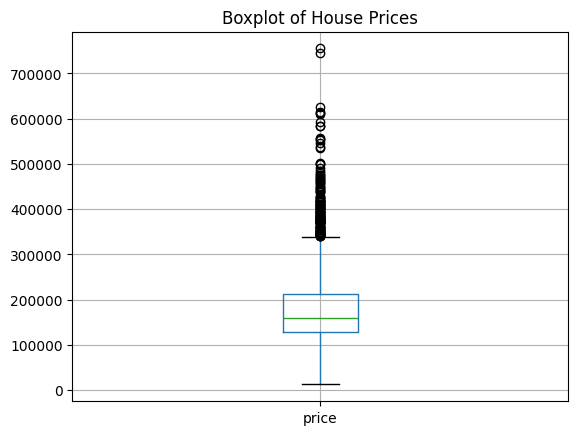

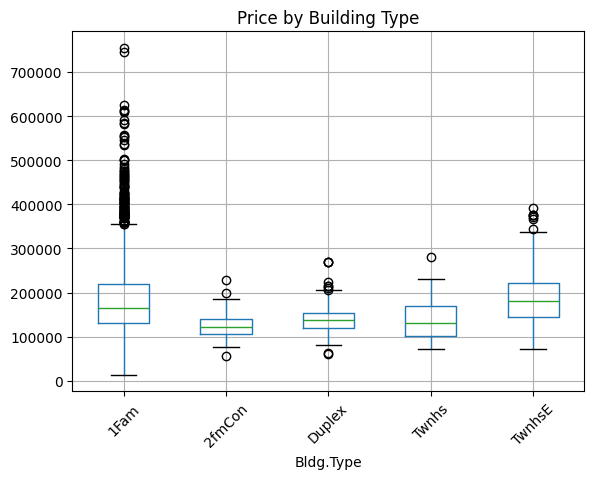

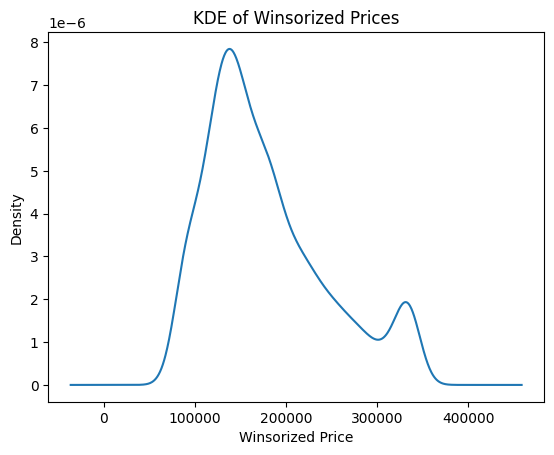

,price_wins
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


In [27]:
from google.colab import files
files.upload()


import pandas as pd
import matplotlib.pyplot as plt

ames = pd.read_csv("ames_prices.csv")
ames.head()
ames.boxplot(column="price")
plt.title("Boxplot of House Prices")
plt.show()

ames.boxplot(column="price", by="Bldg.Type", rot=45)
plt.title("Price by Building Type")
plt.suptitle("")
plt.show()


Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

ames["outlier"] = (
    (ames["price"] < Q1 - 1.5 * IQR) |
    (ames["price"] > Q3 + 1.5 * IQR)
)

ames["outlier"].value_counts()


lower = ames["price"].quantile(0.05)
upper = ames["price"].quantile(0.95)

ames["price_wins"] = ames["price"].clip(lower, upper)

ames["price_wins"].plot(kind="kde")
plt.xlabel("Winsorized Price")
plt.title("KDE of Winsorized Prices")
plt.show()

ames["price_wins"].describe()

Q7. This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:

• `price` - Sale price value of the house
• `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.

The dataset was successfully read into a pandas DataFrame and contains housing price information along with building type classifications.

2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?

The kernel density plot shows that housing prices are heavily right-skewed, with most properties concentrated around $150,000–$200,000 and a long tail toward higher prices. When examining prices by building type, single-family homes (1Fam) and end-unit townhomes (TwnhsE) have the highest average sale prices, while two-family conversions (2fmCon) tend to be the least expensive. Single-family homes also display the greatest variation in prices, as evidenced by both the wider KDE spread and the larger standard deviation.

3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).

The ECDF and five-number summary show a minimum home price of $12,789, a first quartile of $129,500, a median of $160,000, a third quartile of $213,500, and a maximum of $755,000. This indicates that while a small number of homes sell for very high prices, most transactions occur well below the upper extreme.

4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?

The boxplot of overall prices reveals numerous high-price outliers. When prices are grouped by building type, these outliers appear most frequently among single-family homes, which also have the largest interquartile range. Townhomes and duplexes show more compact distributions and fewer extreme values.

5. Make a dummy variable indicating that an observation is an outlier.

Applying the 1.5×IQR rule identifies 137 homes as outliers, while 2,793 observations fall within the non-outlier range. This suggests that extreme prices are driven by a relatively small subset of properties.

6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

After winsorizing the price variable, the highest values are capped at $335,000, reducing the impact of extreme observations. As a result, the mean and standard deviation decrease, while the median and quartiles remain unchanged. The updated kernel density plot is less skewed, indicating that winsorization reduces the influence of outliers while preserving the central tendency of home prices.

